Kita dapat melakukan pemrograman secara individu dari 0 untuk melakukan simulasi n-benda, tapi kita juga dapat melakukan simulasi n-benda dengan modul-modul yang sudah dikembangkan orang lain seperti NBODY Series (NBODY6++) Starlab, ACS, AMUSE (https://amusecode.github.io/), REBOUND (https://rebound.readthedocs.io/en/latest/), GADGET, SWIFT, dan lain-lain. Yang akan kita pakai di praktikum ini adalah Rebound.

Materi praktikum ini diambil dari dokumentasi Rebound dan bisa dilanjutkan sendiri bila tertarik.

Tujuan praktikum ini adalah:
1. Mahasiswa mampu memodelkan kasus-kasus n-benda
2. Melatih mahasiswa sehingga mampu melakukan pemodelan n-benda secara manual

Install rebound

In [ ]:
#jangan lupa menuliskan komentar dan catatan
#dapat digunakan untuk pemahaman dan kalian di masa depan akan berterimakasih
#install setiap reload / refresh

!pip install rebound

     |████████████████████████████████| 255 kB 5.0 MB/s 
  Created wheel for rebound: filename=rebound-3.19.3-cp37-cp37m-linux_x86_64.whl size=604032 sha256=1b6ce67240b2a5847c1de4e46f63f85582bb01cee523a6a40dcf54d2f4817ac6
  Stored in directory: /root/.cache/pip/wheels/b7/ad/4e/17f873dfcb15eeed866dba5f71b77ecb539b140abb6bd7eabf
Successfully built rebound


**Pengenalan Rebound**

In [ ]:
#import rebound sebelum digunakan
import rebound

from IPython.display import display, clear_output
import matplotlib.pyplot as plt

import numpy as np

#buat plot di dalam tab ini
%matplotlib inline

In [ ]:
#buat simulasi baru
sim1 = rebound.Simulation()

In [ ]:
sim1.add(m=3.0)
sim1.add(m=1.0e-3, a=1.3)

In [ ]:
#tambah massa
#massa 1 sebagai pusat
sim1.add(m=3.0)
#massa 2 dengan a=1
sim1.add(m=1.0e-3, a=1.0)

In [ ]:
#nyatakan posisi kedua massa pada waktu t=1000s
sim1.integrate(1000.)

In [ ]:
#cetak status kedua massa pada waktu t=1000s
sim1.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	Apr 26 2022 08:55:38
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+03
Current timestep:    	0.150118
---------------------------------
<rebound.particle.Particle object at 0x7f24148a0cb0, m=3.0 x=9.922707004655139e-07 y=0.506256006159013 z=0.0 vx=3.424821066222755e-05 vy=1.1597066224782164e-06 vz=0.0>
<rebound.particle.Particle object at 0x7f24147909e0, m=0.001 x=1.297023187897611 y=0.5941958950101839 z=0.0 vx=-0.10274463198668267 vy=1.5158830945046182 vz=0.0>
---------------------------------


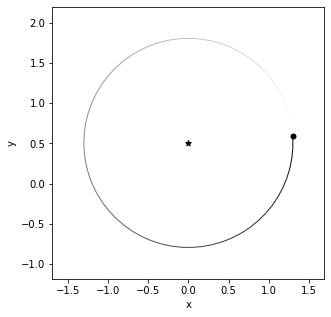

In [ ]:
#nyatakan dalam grafik dengan menggunakan perintah OrbitPlot
%matplotlib inline
fig, ax = rebound.OrbitPlot(sim1)

1. Cobalah menggambarkan grafik dari waktu t=0 sampai t=1000000

Masih ingatkan kalian pada elemen orbit? Elemen orbit dapat dinyatakan pada perintah add sebagai berikut:

float= bisa dimasukkan nilai koma


d (float): jarak radial dari titik referensi


v (float): kecepatan relatif terhadap kecepatan obyek pusat


h (float): momentum sudut


P (float): periode orbit (bernilai negatif kalau merupakan hiperbola)


n (float): gerak rerata/ *mean motion *((bernilai negatif kalau merupakan hiperbola)


a (float): sumbu semimayor


e (float): eksentrisitas


inc (float): inklinasi


Omega (float): bujur titik nodal naik


omega (float): argumen perisenter


pomega (float): bujur perisenter


f (float): anomali benar


M (float): anomali rata-rata/ mean anomali


E (float): anomali eksentrik (perlu memecahkan persamaan Kepler, hitung saat diperlukan saja)


l (float): bujur rerata Omega + omega + M


theta (float): bujur benar = Omega + omega + f


T (float): waktu pericenter (waktu lewat dari pericenter)

rhill (float): radius hill

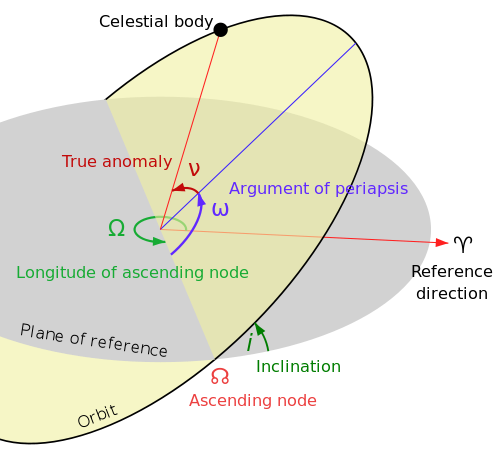

In [ ]:
#mari coba untuk sistem yang lebih rumit
sim2 = rebound.Simulation()
sim2.add(m=1)
sim2.add(m=0.1, e=0.041, a=0.4, inc=30, f=0.43, Omega=0.82, omega=2.98)
sim2.add(m=1e-3, e=0.24, a=1.0, pomega=2.14)
sim2.add(m=1e-3, e=0.24, a=1.5, omega=1.14, l=2.1)
sim2.add(a=-2.7, e=1.4, f=-1.5,omega=-0.7) # hyperbolic orbit

2. Ilustrasikan orbit salah satu dari 4 obyek yang disebut di atas

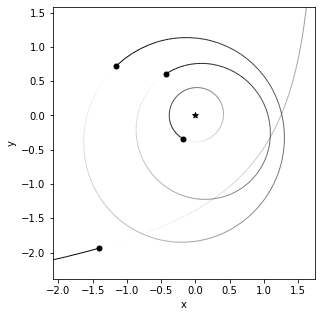

In [ ]:
fig, ax = rebound.OrbitPlot(sim2)

Bisa diilustrasikan dengan cara2 lain. Misal, diberi warna dan tidak dibatasi x dan y

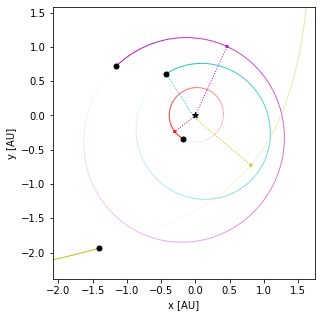

In [ ]:
fig, ax = rebound.OrbitPlot(sim2, unitlabel="[AU]", color=True, periastron=True)

Misal untuk kasus pertama yang kita buat tadi, kita bisa buat orbitnya secara penuh

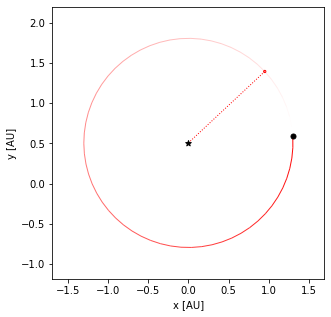

In [ ]:
fig, ax = rebound.OrbitPlot(sim1, unitlabel="[AU]", color=True, periastron=True)

Dan sebagainya, bisa kalian coba

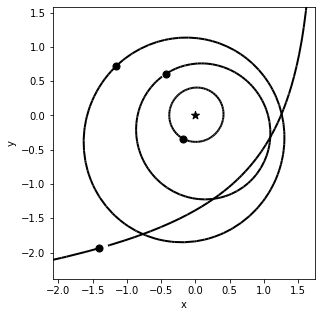

In [ ]:
fig, ax = rebound.OrbitPlot(sim2, orbit_type="solid", lw=2)

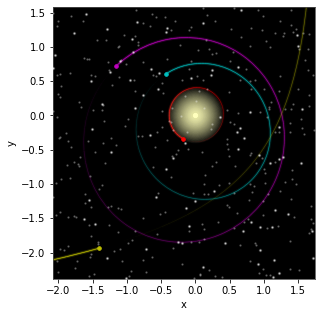

In [ ]:
fig, ax = rebound.OrbitPlot(sim2, fancy=True, color=True, lw=0.5)

Ilustrasi yang kita buat adalah ilustrasi menggunakan koordinat Jacobi. Pada rebound, hal ini dinyatakan dengan cara menyatakan partikel berurutan dengan meningkatnya sumbu semimayor.

Kita dapat membuat animasi atau menampilkan orbit dalam rentang waktu tertentu. Contoh di sel berikut adalah untuk 10 langkah.

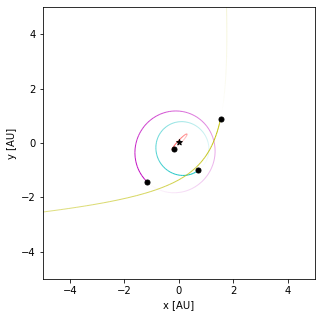

In [ ]:
#pindah ke pusat momentum sebelum diintegrasi
sim2.move_to_com()
#integrasi 10 langkah
for i in range(40):
#menggunakan integrator bawaan (akan disebut di sesi berikutnya)
#0.31 di sini menunjukkan step/ langkah per 1 lingkaran. Bisa dikurangi untuk hasil yang lebih halus
    sim2.integrate(sim2.t+0.31)
    fig, ax = rebound.OrbitPlot(sim2,color=True,unitlabel="[AU]",xlim=[-5,5.],ylim=[-5,5.])
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

Dalam script di atas, jika kita ingin melihat penampakan comet masuk ke dalam sistem, kita dapat mengintegrasikan lebih dalam lagi

Untuk kenampakan tiga dimensi dari orbit, dapat menggunakan perintah slice. Contoh penggunaan slice

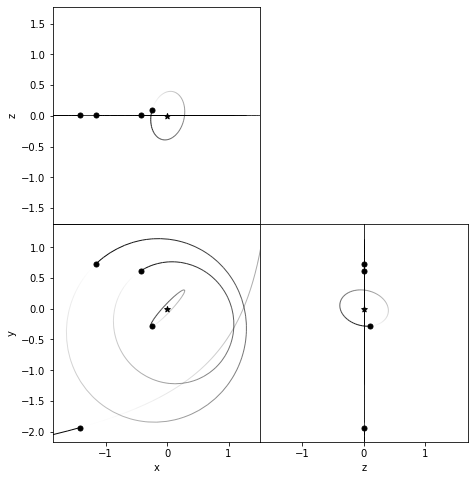

In [ ]:
fig = rebound.OrbitPlot(sim2,slices=1,xlim=[-2.,2],ylim=[-2.,2])

In [ ]:
#kalau nama sudah dipakai, variabel bisa dihapus
#del sim
del.sim1()

SyntaxError: ignored

In [ ]:
#buat simulasi
sim3 = rebound.Simulation()
#tambahkan obyek-obyek tata surya yang terkait, di sini kita menggunakan data matahari, Jupiter, dan Saturnus
sim3.add("Jupiter")
sim3.add("Ganymede")
sim3.add("Io")


Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Ganymede'... 
Found: Ganymede (503) 
Searching NASA Horizons for 'Io'... 
Found: Io (501) (chosen from query 'Io')


In [ ]:
#tanpa memasukkan manual, kita langsung dapat menggunakan informasi orbit kedua planet
for orbit in sim3.calculate_orbits():
    print(orbit)

<rebound.Orbit instance, a=0.3870984599478126 e=0.20562463163495043 inc=0.12223616582571624 Omega=0.8430343901156934 omega=0.5094419749753127 f=1.2613837561112664>
<rebound.Orbit instance, a=1.0000057209785032 e=0.01670463033561332 inc=5.035109203323409e-05 Omega=3.034058633155344 omega=5.049982451489392 f=1.9661580389957862>
<rebound.Orbit instance, a=1.523669079037297 e=0.09343925495461891 inc=0.03225245498681783 Omega=0.863769208014091 omega=5.004437053985076 f=5.66734920831653>
<rebound.Orbit instance, a=2.7817053562688785 e=0.23618253629237118 inc=0.07105372158284563 Omega=-2.842784184858022 omega=3.0486025938243753 f=2.7739756820784676>


In [ ]:
sim3.add("NAME=Galatea")

Searching NASA Horizons for 'NAME=Galatea'... 
Found: 74 Galatea (A862 QA) 


/usr/local/lib/python3.7/dist-packages/rebound/horizons.py:160: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Terdapat peringatan bahwa massa tidak ditemukan. Sebenarnya karena massa sangat kecil dibanding obyek-obyek lain, kita tidak memerlukan informasi massa. Kalau ingin menambah

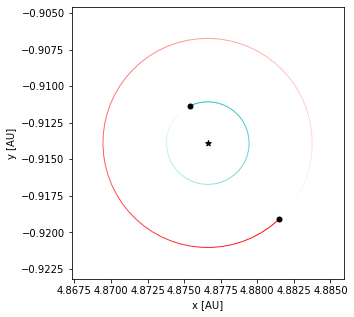

In [ ]:
#gambarkan orbit
fig = rebound.OrbitPlot(sim3, unitlabel="[AU]", color = True)

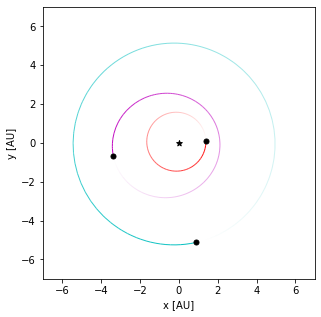

In [ ]:
#pindah ke pusat momentum sebelum diintegrasi
sim3.move_to_com()
#integrasi 10 langkah
for i in range(30):
#menggunakan integrator bawaan (akan disebut di sesi berikutnya)
#0.31 di sini menunjukkan step/ langkah per 1 lingkaran. Bisa dikurangi untuk hasil yang lebih halus
    sim3.integrate(sim3.t+0.9)
    fig, ax = rebound.OrbitPlot(sim3,color=True,unitlabel="[AU]",xlim=[-7,7.],ylim=[-7,7.])
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

In [ ]:
sim4 = rebound.Simulation()

In [ ]:
sim4.add("Sun")
sim4.add("Jupiter")
sim4.add("Saturn")
sim4.add("NAME=Swift-Tuttle; CAP")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'NAME=Swift-Tuttle; CAP'... 
Found: 109P/Swift-Tuttle 


/usr/local/lib/python3.7/dist-packages/rebound/horizons.py:160: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


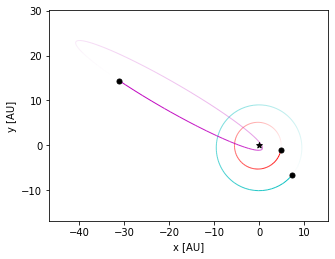

In [ ]:
#gambarkan orbit
fig = rebound.OrbitPlot(sim4, unitlabel="[AU]", color = True)

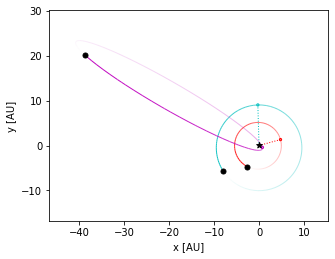

In [ ]:
#pindah ke pusat momentum sebelum diintegrasi
sim4.move_to_com()
#integrasi 10 langkah
for i in range(100):
#menggunakan integrator bawaan (akan disebut di sesi berikutnya)
#0.31 di sini menunjukkan step/ langkah per 1 lingkaran. Bisa dikurangi untuk hasil yang lebih halus
    sim4.integrate(sim4.t+1)
    fig, ax = rebound.OrbitPlot(sim4,color=True,unitlabel="[AU]",periastron=True)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

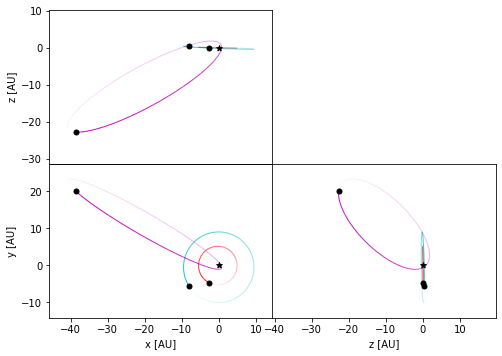

In [ ]:
#gambarkan orbit
fig = rebound.OrbitPlot(sim4, slices=1, unitlabel="[AU]", color = True)

Selanjutkan kita akan mencoba melakukan prediksi lokasi komet tersebut pada waktu tertentu dengan integrator. Yang akan digunakan adalah IAS15 (Rein dan Spiegel, 2015, https://academic.oup.com/mnras/article/446/2/1424/2892331). Banyak integrator yang ada, seperti WHFast (Wisdom-Holman) (Rein dan Tamayo, 2015, https://arxiv.org/abs/1506.01084), EnckeHH (Hernandez dan Holman, 2021, https://arxiv.org/abs/2010.13907v2), Hermes (Silburt,Rein, dan Tamayo, 2016, https://astro.utoronto.ca/~silburt/HERMES.pdf), bisa disesuaikan dengan kebutuhan simulasi.
Pada Rebound, opsi yang bisa digunakan: 'IAS15' (default) ,'WHFast', 'SEI', 'LEAPFROG','JANUS', 'MERCURIUS', 'WHCKL', 'WHCKM', 'WHCKC', 'SABA4','SABACL4','SABACM4','SABA(10,6,4)','EOS','none

Pada praktikum ini kita akan melakukan prediksi lokasi komet mundur 70 tahun ke belakang.

In [ ]:
#karena mundur, step/ langkah waktu dibuat negatif
sim4.dt = 0.01

In [ ]:
import numpy as np
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,150.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

In [ ]:
 #IAS15 adalah integrator bawaan, sebenarnya kita tidak perlu mendefinisikan. Bisa dicoba dengan integrator lain
sim4.integrator = "ias15"
#seperti sebelumnya, pindah ke pusat momentum
sim4.move_to_com()
ps = sim4.particles

for i,time in enumerate(times):
    sim4.integrate(time)
#menyimpan data untuk diplot
    x[0][i] = ps[2].x
    y[0][i] = ps[2].y
    z[0][i] = ps[2].z
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y
    z[1][i] = ps[3].z

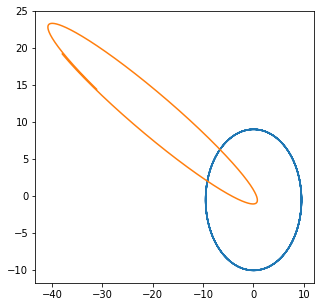

In [ ]:
#visualisasi jupiter dan komet
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

Jarak terdekat (1.329344 AU) akan terjadi pada waktu: 101.845185 tahun.


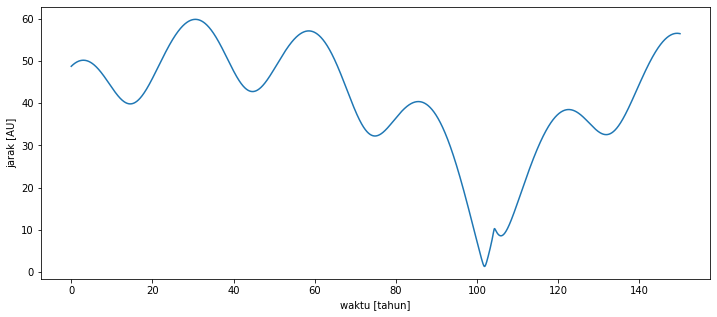

In [ ]:
#membuat plot jarak terdekat komet tersebut lagi
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("waktu [tahun]")
ax.set_ylabel("jarak [AU]")
#menghitung jarak 3 dimensi antara objek 1 dan 3 (jupiter dan komet)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Jarak terdekat (%f AU) akan terjadi pada waktu: %f tahun." % (np.min(distance),closeencountertime))

In [ ]:
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("Yaitu pada tanggal %Y-%m-%d")

'Yaitu pada tanggal 2124-03-01'

Tugas:
1. Buatlah model tata surya atau sistem planet dan satelitnya dengan 2 integrator berbeda! (Jika memilih planet dan satelit, gunakan planet yang satelitnya banyak seperti Jupiter atau Saturnus)
2. Buatlah orbit komet atau asteroid dan hitung jarak terdekat obyek tersebut dengan planet tertentu mengikuti cara yang telah ditunjukkan di atas! Boleh juga menggunakan objek berupa spacecraft seperti Horizon atau Casini seperti apa lintasan orbitnya (tiap mahasiswa harus berbeda objeknya, daftar objek yang digunakan bisa mengisi list di link https://docs.google.com/spreadsheets/d/1kCsrukvuhgdyV7Jq2ZkW2GTvX5h2TaCh2owTGRQUK-k/edit?usp=sharing
3. untuk nomor 2 buatlah simulasi ketika benda langit tersebut melakukan "close encounter" selama 100 tahun ke belakang dan prediksikan selama 100 tahun ke depan!
4. Analisis hasil yang kalian dapatkan!